<a href="https://colab.research.google.com/github/sune-el/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Email Campaign Effectiveness Prediction 

**Problem Statement**

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.



In [ ]:
#importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stat
import pylab
import missingno as mno
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#importing random under sampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#importing SMOTE
from imblearn.over_sampling import SMOTE

#importing ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Path of data in drive
data_path="/content/drive/MyDrive/data_email_campaign.csv"
#Reading csv file
email_df=pd.read_csv(data_path)


In [ ]:
#Data head
email_df.head()


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


Email_ID - This column contains the email ids of individuals.

Email_type - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

Subject_Hotness_Score - It is the subject-line effectiveness score.

Email_Source - It represents the source of the email like sales,marketing or product type email.

Email_Campaign_Type - Campaign type

Total_Past_Communications - This column contains the previous mails from the source.

Customer_Location - Categorical data which explains the different demographic location of the customers.

Time_Email_sent_Category - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

Word_Count - It contains the no.of words in the mail.

Total_Links - Total links in the email body.

Total_Images - The banner images in the email body.

Email_Status - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.



##Exploraray Data Analysis(EDA)

In [ ]:
#Retreiving list of  Column names
email_df.columns


Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Shape of the data set
email_df.shape

(68353, 12)

In [ ]:
# checking the null values in the data set
email_df.duplicated().sum()

0

if we observe in the data set there is no duplicated values 

In [ ]:
#describing the data set
email_df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [ ]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In this data set 4 columns contains null values

## Analysis on Catagerical columns

Focus on the catagerical columns, it helps to understand how many catagerical columns in the data.

In [ ]:
#creating new dataframe for only categorical columns
df_cat = email_df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
df_cat.drop('Word_Count',axis=1,inplace=True)
df_cat.head()


,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0
2,EMA00081000066290,2,1,B,3,2,1
3,EMA00081000076560,1,2,E,2,2,0
4,EMA00081000109720,1,2,C,3,2,0


In [ ]:
#catogerocal features
df_cat_fts = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in df_cat.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [df_cat[c].unique()]
    tmp['Total Count'] = len(list(df_cat[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(df_cat[c].nunique())
    tmp['Missing Value'] = df_cat[c].isnull().sum()
    tmp['Missing %'] = (df_cat[c].isnull().sum()/ len(df_cat)).round(3)*100
    df_cat_fts = df_cat_fts.append(tmp)
    
df_cat_fts


,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.0
0,Email_Type,"[1, 2]",2,2,0,0.0
0,Email_Source_Type,"[2, 1]",2,2,0,0.0
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,17.0
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.0
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.0
0,Email_Status,"[0, 1, 2]",3,3,0,0.0


As we can see we have 17% missing values in Customer Location.


There is no missing values in any other categorical variable.


Email_Type and Email_Source_Type have 2 categories.


Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories


Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7.



**Relationship Between Dependent and Independent Variables**

In [ ]:
#Dropping Email_ID column
df_cat.drop('Email_ID',axis=1,inplace=True)


In [ ]:
def barPerc(df,xVar,ax):
    ''' barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    #  how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])
    #  The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

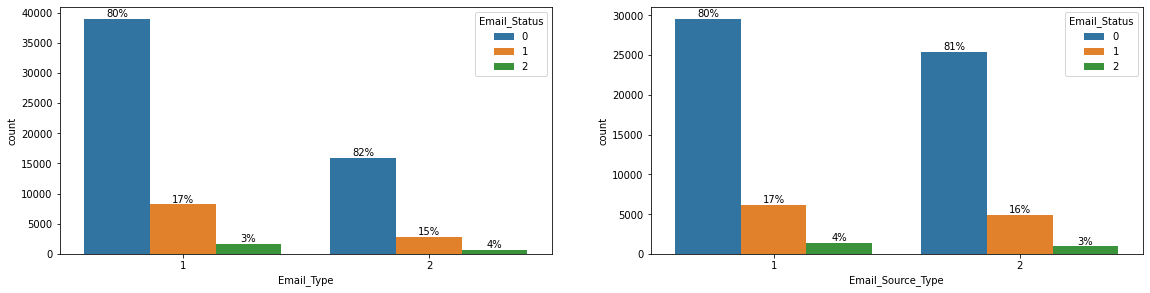

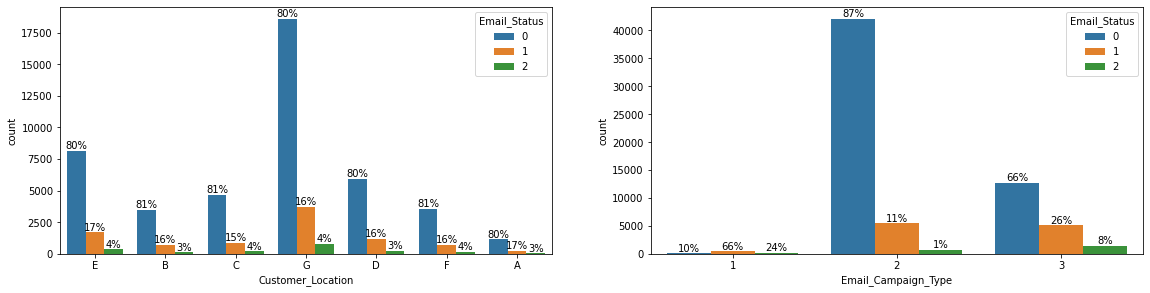

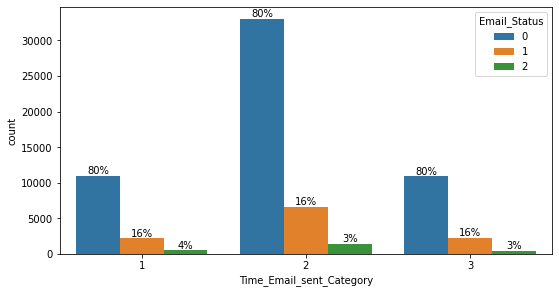

<Figure size 2160x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(df_cat.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df_cat, x=c,hue='Email_Status' ,ax = ax1)
            barPerc(df_cat,c,ax1)            
    ix = ix +1
    if ix == 3: 
        fig = plt.figure(figsize = (30,10))
        ix =1


As we can observe the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend . For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.



In [ ]:
# numerical columns
df_num = email_df.select_dtypes(include =['float']).copy()
df_num['Word_Count'] = email_df.loc[df_num.index, 'Word_Count'].copy()
df_num.head()


,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504
2,0.1,36.0,5.0,0.0,962
3,3.0,25.0,16.0,0.0,610
4,0.0,18.0,4.0,0.0,947


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

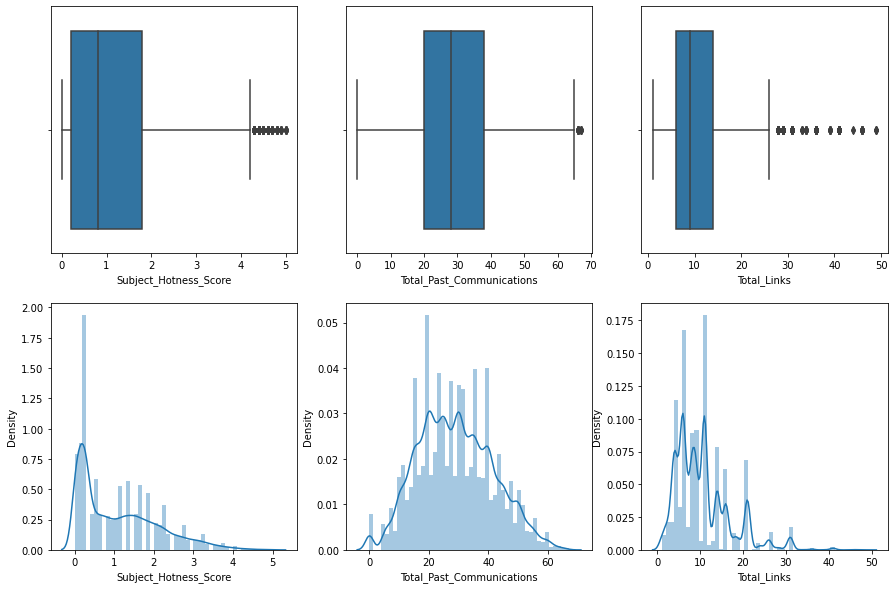

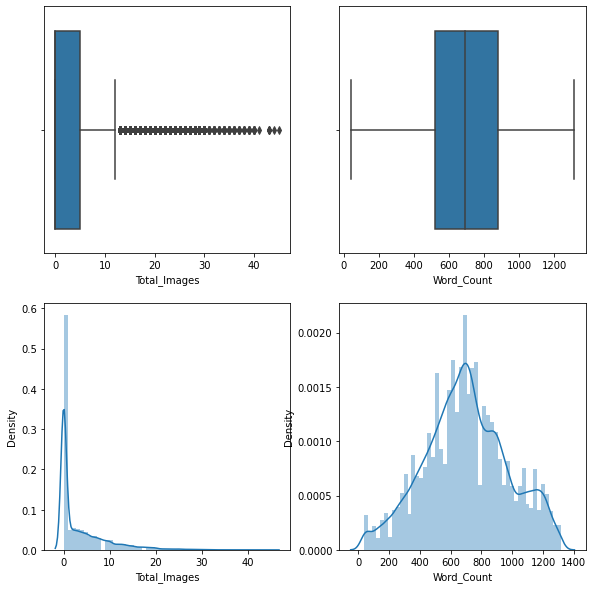

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df_num.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = df_num, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(df_num[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1


There are outliers in Subject_Hotness_Score,Total_Links and Total_Images and the distribution of these features are right skewed in nature. There are also a few outliers in Total_Past_Communication which has a normal distribution .



In [ ]:
df_num['Email_Status'] = email_df.loc[df_num.index, 'Email_Status'].copy()


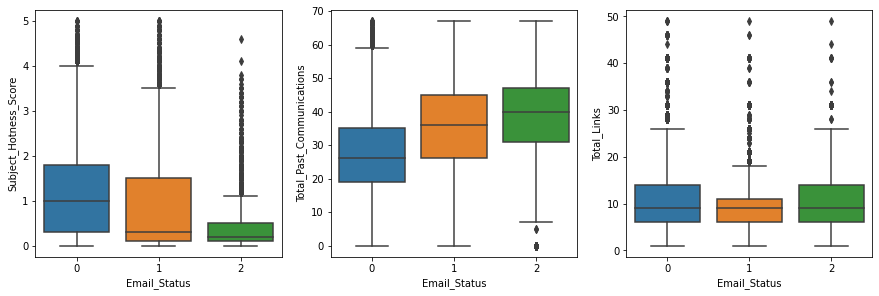

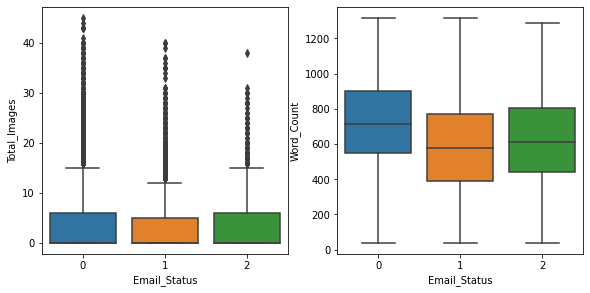

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df_num.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=df_num, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1


Subject_Hotness_Score -> All Email_Status i.e 0,1,2 have outliers. 0 have highest median and 1,2 are right skewed. It is observed that the
Subject_Hotness_Score for read/acknowledged mails are much lower.



Total_Past_Communications -> 0,2 have outliers and 2 have highest median .



Total_Links ->0,1,2 all have outliers,All have the same median but 0,2 have higher variance compare to 1.



Total_Images ->0,1,2 all have outliers and All have the same median. Hence all the mails have the same range of images.



Word_Count ->Median of 0 is highest. Thus we can understand that ignored mails have higher word count.


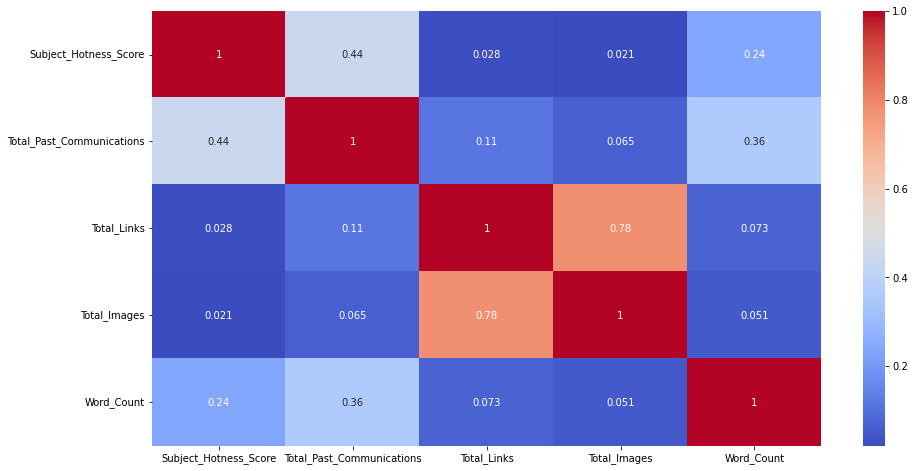

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df_num.drop('Email_Status',axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


We can observe that there is a relationship between Total_Images and Total_Links, they have 78% positive correlation. To understand if this relation holds true, we try and validate with a lmplot b/w the two features.



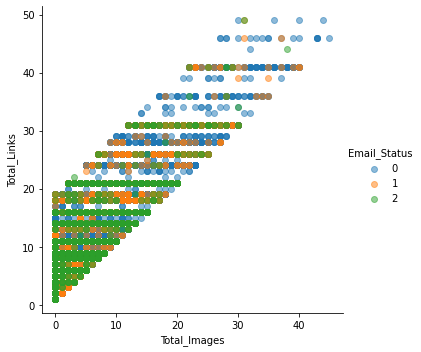

In [ ]:
sns.lmplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=email_df, fit_reg=False, scatter_kws={'alpha':0.5})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


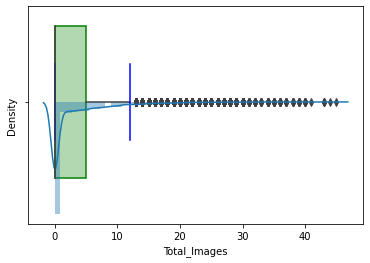

In [ ]:
ax=sns.boxplot(df_num['Total_Images'],capprops=dict(color="blue"),boxprops=dict(facecolor="red", color="green"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(df_num['Total_Images'])


if we obsreve in the above plot,More than 50% of values are 0 and there is a presence of outliers in Total_Images



In [ ]:
#Finding number of data having 0 images
img_count_0=df_num[df_num['Total_Images']==0].count()['Total_Images']
#Total number of non nan data
total=df_num['Total_Images'].count()
#finding percentage
pcnt_img_0=(img_count_0/total)*100
print("Percentage of data having Total_Images Zero is = ",pcnt_img_0)
print(img_count_0)

Percentage of data having Total_Images Zero is =  52.58263843061971
35060


Percentage of data having Total_Images Zero is =  52.58263843061971
and image count is 35060


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


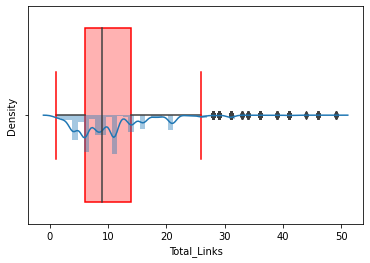

In [ ]:
ax=sns.boxplot(df_num['Total_Links'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(df_num['Total_Links'])


Compared to Total_Images, Total_Links has very few outliers. Since images and links are correlated and most of the values in Total_Images is 0 we will combine both the features. Before that we need to see if there is any null values in this column .



In [ ]:
# Number of NaNs for each columns
email_df.isnull().sum()


Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

##Null value  imputation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


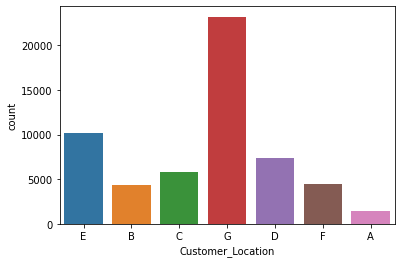

In [ ]:
#Visualizing Customer_Location
sns.countplot(email_df['Customer_Location'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


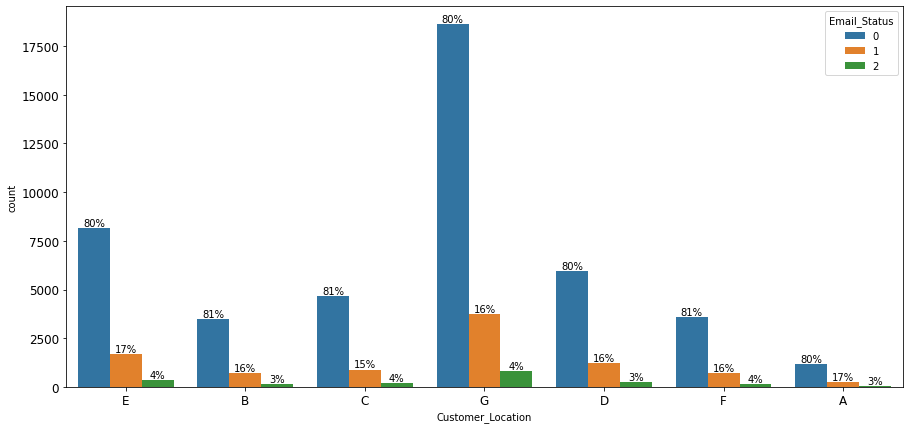

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(email_df['Customer_Location'],hue=email_df['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)
barPerc(email_df,'Customer_Location',ax)


In [ ]:
'''
print('Shape of data before dropping ',email_data.shape)
#dropping Customer_Location column
email_data.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)
'''


"\nprint('Shape of data before dropping ',email_data.shape)\n#dropping Customer_Location column\nemail_data.drop('Customer_Location',inplace=True,axis=1)\nprint('Shape of data after dropping ',email_data.shape)\n"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


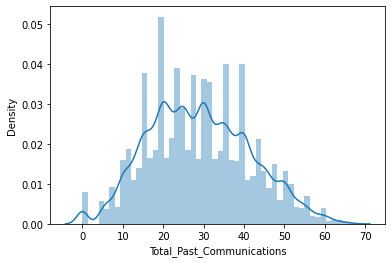

In [ ]:
sns.distplot(email_df.Total_Past_Communications)


In [ ]:
print('Number of missing values before imputing is = ',email_df['Total_Past_Communications'].isnull().sum())
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Past_Communications'].isnull().sum())


Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


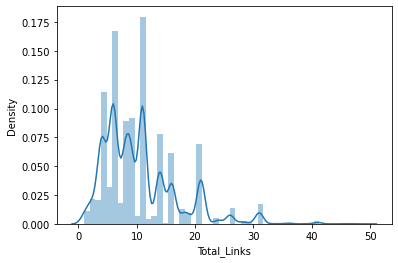

In [ ]:
sns.distplot(email_df.Total_Links)


In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_df['Total_Links'].isnull().sum())
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Links'].isnull().sum())


Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


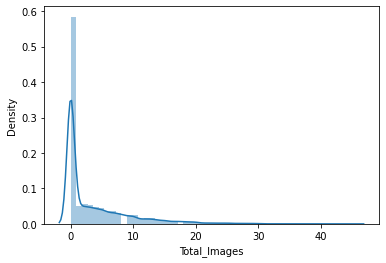

In [ ]:
sns.distplot(email_df.Total_Images)


In [ ]:
#Filling missing values of Total_images column
print('Number of missing values before imputing is = ',email_df['Total_Images'].isnull().sum())
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Images'].isnull().sum())


Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


In [ ]:
email_df.isnull().sum()


Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

In [ ]:
email_df['Links_Images']=email_df['Total_Links']+email_df['Total_Images']


In [ ]:
#Dropping Total_Images and Total_Links  column
print('Shape of data before dropping ',email_df.shape)
email_df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',email_df.shape)


Shape of data before dropping  (68353, 13)
Shape of data after dropping  (68353, 11)


Text(0.5, 1.0, 'Pie Chart showing Email Status')

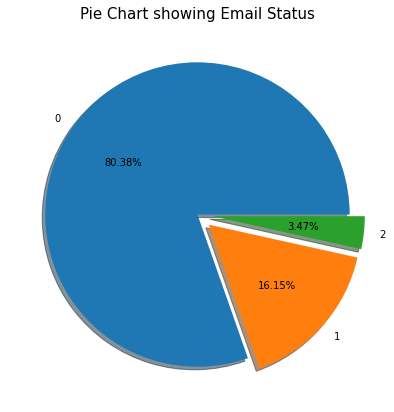

In [ ]:
# Plotting a pie chart for Email_Status
plt.figure(figsize = (10,7))
plt.pie(email_df['Email_Status'].value_counts(), labels = [0,1,2], explode = [0,0.1,0.1], autopct='%1.2f%%', shadow = True)
plt.title('Pie Chart showing Email Status', fontsize = 15)


Around 3.47% of the emails are actually hitting targets that is those customers are reading and acknowledging the mails. Around 16.15% of customers are reading the mails who might be potential customers given some offers or something else.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Types bar plot')

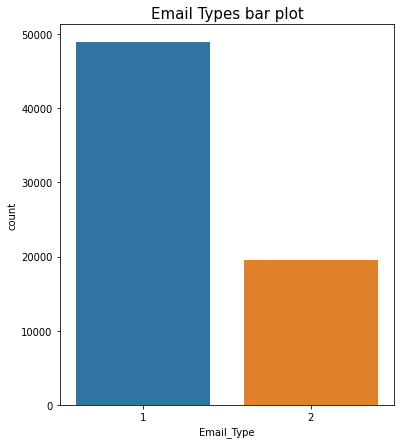

In [ ]:
# Plotting bar plot for Email_Type
plt.figure(figsize=(6,7))
sns.countplot(email_df['Email_Type'])
plt.title('Email Types bar plot', fontsize=15)


##Feature Engineering

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(email_df[[i for i in email_df.describe().columns if i not in ['Email_ID','Customer_Location','Email_Type','Email_Source_Type','Email_Campaign_Type']]])


,variables,VIF
0,Subject_Hotness_Score,2.062931
1,Total_Past_Communications,5.423955
2,Time_Email_sent_Category,8.815890
3,Word_Count,5.192721
4,Email_Status,1.300847
5,Links_Images,2.632242


##Outlier Treatment

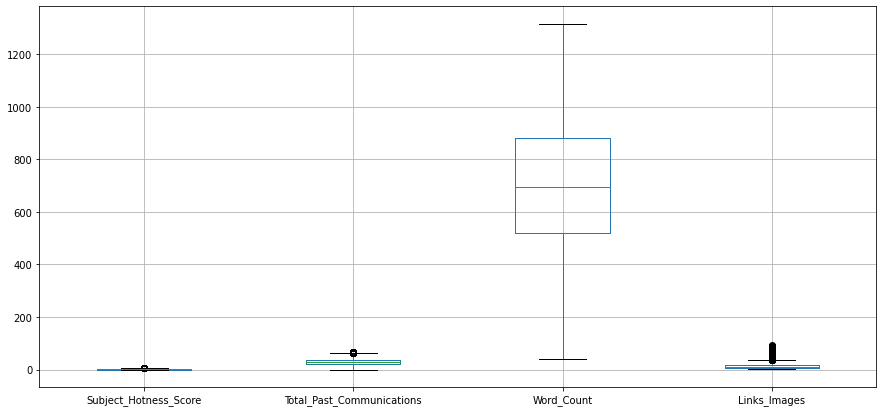

In [ ]:
#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
email_df.boxplot(numerical_col)


Except Word_Count column all other numeric column have outliers. Since our dependent variable is highly imbalanced so before dropping outliers we should check that it will not going to delete more than 5% of minority class which is Email_Status =1,2



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Links_Images': {0: 3061, 1: 437, 2: 122}}


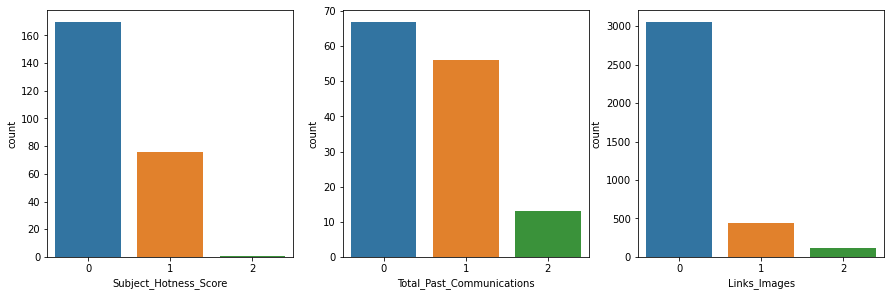

In [ ]:
#removing Word_Count because it does'nt have outlier
numerical_col.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
ix = 1
#dictionary d to store the count of each email_status 
d={}
#iterating through each column which have outlier
for x in [y for y in numerical_col]:
    #Finding Quartile
    q75,q25 = np.percentile(email_df.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    intr_qr = q75-q25
    #Fixing Boundaries for outliers
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    #list y to store email_status of only outliers
    y=[]
    y=email_df.loc[email_df[x] < min]['Email_Status'].tolist()
    y.append(email_df.loc[email_df[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    ix = ix +1
print(d)


In [ ]:
#finding the percentage of minority classs going to be affected by outliers
sum_min=0
sum_maj=0
for x in [y for y in numerical_col]:
  sum_min+=d[x][1]
  sum_min+=d[x][2]
  sum_maj+=d[x][0]
total=email_df.groupby('Email_Status').count()['Email_Type'][1]+email_df.groupby('Email_Status').count()['Email_Type'][2]
total_0=email_df.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)


Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


In [ ]:
#Dropping Email_ID column
print('Shape of data before dropping ',email_df.shape)
email_df.drop('Email_ID',inplace=True,axis=1)
print('Shape of data after dropping ',email_df.shape)


Shape of data before dropping  (68353, 11)
Shape of data after dropping  (68353, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


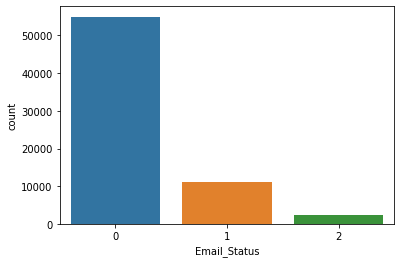

In [ ]:
sns.countplot(email_df['Email_Status'])


In [ ]:
email_df.groupby('Email_Status').count()['Email_Type']


Email_Status
0    54941
1    11039
2     2373
Name: Email_Type, dtype: int64

Dependent variable is highly imbalanced . Before treating that lets normalize our data



##Feature Normolaization

In [ ]:
# apply normalization techniques
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
for column in numerical_col:
    email_df[column] = (email_df[column] - email_df[column].min()) / (email_df[column].max() - email_df[column].min())


In [ ]:
email_df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,E,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,NaN,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,B,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,E,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,C,3,0.268657,2,0.710815,0,0.032609


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

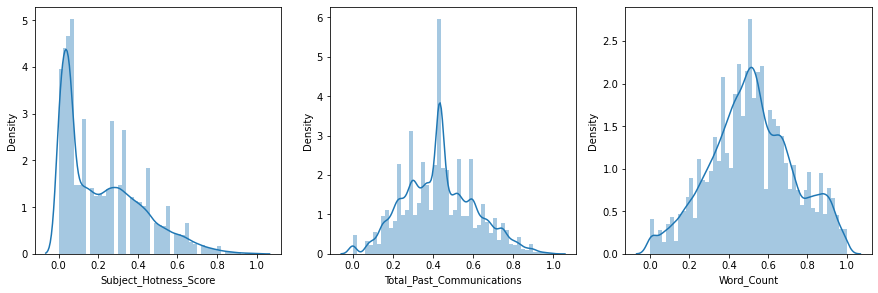

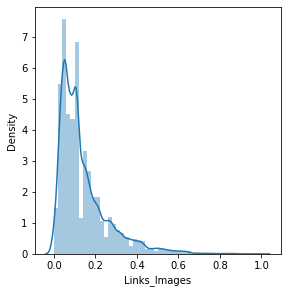

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in numerical_col:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(email_df[c], ax=ax1)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1


##One Hot Encoding

In [ ]:
email_df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,E,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,NaN,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,B,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,E,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,C,3,0.268657,2,0.710815,0,0.032609


In [ ]:
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Customer_Location']
email_df=pd.get_dummies(email_df, columns=cat_col)
email_df.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
email_df.drop('Email_Source_Type_2',axis=1,inplace=True)


In [ ]:
#Pushing Email_Status at last of the DataFrame
list_of_col=list(email_df.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
email_data=email_df[list_of_col]
email_data.head()


,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.02,0.537313,0.722571,0.043478,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
3,0.60,0.373134,0.446708,0.163043,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,0.00,0.268657,0.710815,0.032609,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0


##Feature Importance

In [ ]:
def feature_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)   
    return(round(impurity, 3))


In [ ]:
def feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = feature_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = feature_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)


Subject_Hotness_Score : 0.03815999999999997
Total_Past_Communications : 0.08543499999999993
Word_Count : 0.04493199999999986
Links_Images : 0.023570999999999898
Email_Type_1 : 0.00040000000000006697
Email_Source_Type_1 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.017567
Email_Campaign_Type_2 : 0.050541999999999976
Email_Campaign_Type_3 : 0.03729300000000002
Time_Email_sent_Category_1 : -0.0008010000000000517
Time_Email_sent_Category_2 : -0.0006019999999999914
Time_Email_sent_Category_3 : 0.0
Customer_Location_A : -0.00025199999999991896
Customer_Location_B : -0.0005920000000000369
Customer_Location_C : -0.000496000000000052
Customer_Location_D : -0.0007840000000000069
Customer_Location_E : -0.0005330000000000057
Customer_Location_F : -0.00048000000000003595
Customer_Location_G : -0.00035600000000002296


Text(0.5, 1.0, 'Feature Importance')

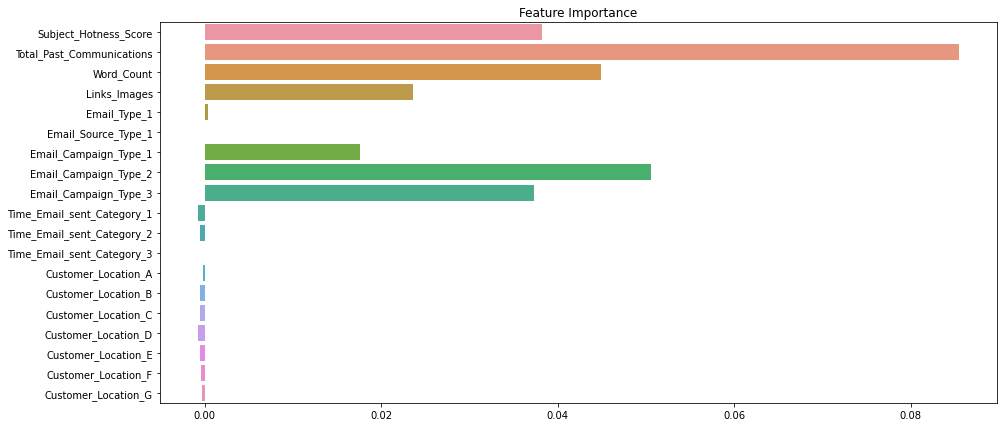

In [ ]:
info_gain={}
for feature in email_data.drop(columns='Email_Status').columns:
    feature_info_gain = feature_information_gain(email_data, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')


In [ ]:
drop=['Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3',
      'Customer_Location_A','Customer_Location_B','Customer_Location_C','Customer_Location_D',
      'Customer_Location_E','Customer_Location_F','Customer_Location_G']
email_data.drop(drop,inplace=True,axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
email_df.head()


,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,0.44,0.492537,0.313480,0,0.076087,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.42,0.223881,0.363636,0,0.043478,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.02,0.537313,0.722571,1,0.043478,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
3,0.60,0.373134,0.446708,0,0.163043,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0.00,0.268657,0.710815,0,0.032609,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [ ]:
email_df.shape

(68353, 20)

##Imbalance Handling

**Random under sampling**


Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(email_data.iloc[:,0:-1], email_data['Email_Status'])

print('Original dataset shape:', len(email_data))
print('Resampled dataset shape', len(y_rus))


Original dataset shape: 68353
Resampled dataset shape 7119


Text(0.5, 1.0, 'Before Undersampling')

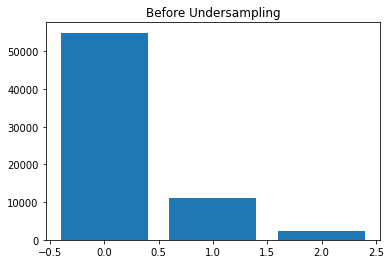

In [ ]:
plt.bar(Counter(email_df['Email_Status']).keys(), Counter(email_df['Email_Status']).values())
plt.title("Before Undersampling")


Text(0.5, 1.0, 'After Undersampling')

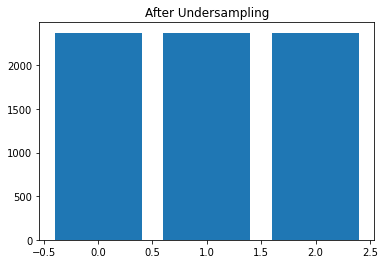

In [ ]:
plt.bar(Counter(y_rus).keys(), Counter(y_rus).values())
plt.title("After Undersampling")


In [ ]:
unique_elements, counts_elements = np.unique(y_rus, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))


Frequency of unique values of the Email_Status:
[[   0    1    2]
 [2373 2373 2373]]


##Splitting Data set 

In [ ]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 3,stratify=y_rus)




* Taking a 80-20 train test split.

  
*   We need to use the stratify parameter inorder to make sure that the train and test datasets have the same ratios of the predictor variables.





##Decision Tree Model

In [ ]:
#  the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()


In [ ]:
dt_classifier.fit(X_train_fs,y_train)


DecisionTreeClassifier()

In [ ]:
#Creating dataframe for storing model evaluated metrics.
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=column_name)


In [ ]:
final_list=[]


In [ ]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}
  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res


----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   0 1898    1]
 [   0    4 1894]]

 Accuracy =  0.9991220368744512

 Recall =  0.9991220368744512

 Precision =  0.9991228667313098

 F1 score =  0.9991220361436879

 Roc_Auc score =  0.9999983813505406


----- Evaluation on test data -----

Confusion matrix 

[[246 141  88]
 [104 219 151]
 [113 137 225]]

 Accuracy =  0.4845505617977528

 Recall =  0.4845505617977528

 Precision =  0.4856566382066183

 F1 score =  0.48496872798414137

 Roc_Auc score =  0.6133633207569306


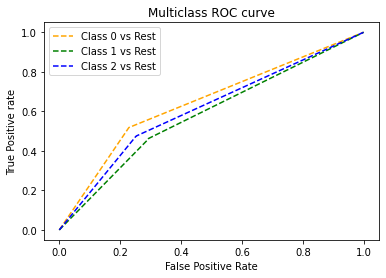

In [ ]:
# Evaluation of our decision tree model
res=evaluate(dt_classifier,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree_On_Under_Sampled_data')
final_list.append(res)


We can observe the results are better on this data compare to Under Sample Data.



We have Good F1 score for both training and testing data using XGBoost model.



##Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)

# Fitting on the train set
svc_model.fit(X_train_fs,y_train)


SVC(probability=True)

----- Evaluation on train data -----

Confusion matrix 

[[1346  188  364]
 [ 636  390  873]
 [ 333  246 1319]]

 Accuracy =  0.5364354697102721

 Recall =  0.5364354697102721

 Precision =  0.5235802182547129

 F1 score =  0.5058614584700288

 Roc_Auc score =  0.7221447372640498


----- Evaluation on test data -----

Confusion matrix 

[[326  39 110]
 [156  94 224]
 [103  63 309]]

 Accuracy =  0.511938202247191

 Recall =  0.511938202247191

 Precision =  0.5058239650387089

 F1 score =  0.48296339920933534

 Roc_Auc score =  0.7022543547247625


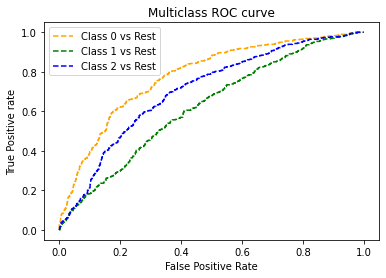

In [ ]:
# Evaluating the SVM Model
res=evaluate(svc_model,X_train_fs,y_train,X_test_fs,y_test,'SVM_On_Under_Sampled_Data')
final_list.append(res)


##Hyper Tuning The SVM model

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 100], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_fs, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   6.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   6.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   6.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   6.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   6.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.498 total time=   7.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   7.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.492 total time=   6.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.491 total time=   6.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   7.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.533 total time=  12.9s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 100], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


----- Evaluation on train data -----

Confusion matrix 

[[1384  209  305]
 [ 619  525  755]
 [ 302  291 1305]]

 Accuracy =  0.5643546971027217

 Recall =  0.5643546971027217

 Precision =  0.5548011845756396

 F1 score =  0.5432740648547688

 Roc_Auc score =  0.7453379748756689


----- Evaluation on test data -----

Confusion matrix 

[[335  56  84]
 [147 126 201]
 [101  84 290]]

 Accuracy =  0.5273876404494382

 Recall =  0.5273876404494382

 Precision =  0.5175795043127296

 F1 score =  0.5088487157610052

 Roc_Auc score =  0.7066994192920287


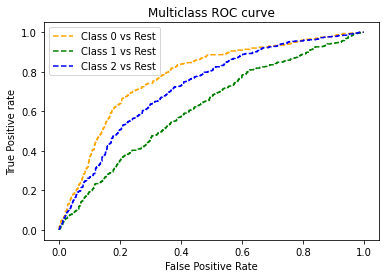

In [ ]:
# Evaluating the tuned model
res=evaluate(grid,X_train_fs,y_train,X_test_fs,y_test,'Hypertuned_SVM_On_Under_Sampled_data')
final_list.append(res)


##SMOTE : Synthetic Minority Oversampling Technique

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



In [ ]:
email_df.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,0.44,0.492537,0.313480,0,0.076087,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.42,0.223881,0.363636,0,0.043478,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.02,0.537313,0.722571,1,0.043478,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
3,0.60,0.373134,0.446708,0,0.163043,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0.00,0.268657,0.710815,0,0.032609,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(email_data.iloc[:,0:-1], email_data['Email_Status'])

print('Original dataset shape', len(email_data))
print('Resampled dataset shape', len(y_smote))


Original dataset shape 68353
Resampled dataset shape 164823


Text(0.5, 1.0, 'Before SMOTE')

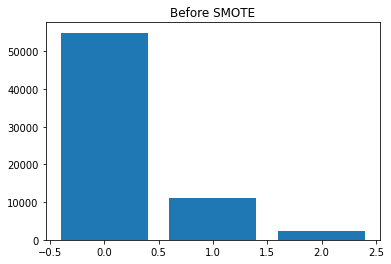

In [ ]:
plt.bar(Counter(email_data['Email_Status']).keys(), Counter(email_data['Email_Status']).values())
plt.title("Before SMOTE")


Text(0.5, 1.0, 'After SMOTE')

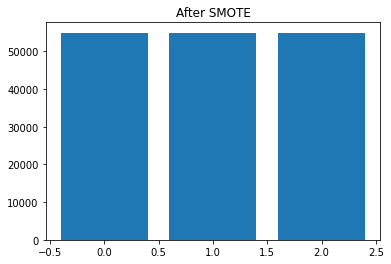

In [ ]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")


In [ ]:
unique_elements, counts_elements = np.unique(y_smote, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))


Frequency of unique values of the Email_Status:
[[    0     1     2]
 [54941 54941 54941]]


Now we have a total balanced data with 54941 records for each class.



In [ ]:
#Split data into train and test
X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify=y_smote)


##Decision Tree

In [ ]:
# Fit the decision tree model
dt_classifier_smote = DecisionTreeClassifier()
dt_classifier_smote.fit(X_train_fs,y_train)


DecisionTreeClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[43951     2     0]
 [  111 43841     1]
 [   32    31 43889]]

 Accuracy =  0.9986576468625339

 Recall =  0.9986576468625339

 Precision =  0.9986606534326185

 F1 score =  0.998657861512579

 Roc_Auc score =  0.9999980075150489


----- Evaluation on test data -----

Confusion matrix 

[[8817 1729  442]
 [1534 8115 1339]
 [ 430 1101 9458]]

 Accuracy =  0.8005460336720764

 Recall =  0.8005460336720764

 Precision =  0.8002666015662195

 F1 score =  0.8003450636496117

 Roc_Auc score =  0.8508577450833815


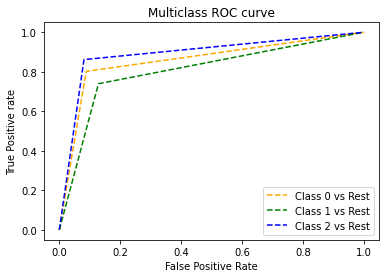

In [ ]:
# Evaluate the results
res=evaluate(dt_classifier_smote,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree')
final_list.append(res)


We can observe the results are better on this data compare to Under Sample Data.



##XGBoost

In [ ]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)


In [ ]:
# Fit the model
xgb_model.fit(X_train_fs,y_train)


XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on train data -----

Confusion matrix 

[[42336  1305   312]
 [ 4435 35270  4248]
 [  717   948 42287]]

 Accuracy =  0.9092584446905004

 Recall =  0.9092584446905004

 Precision =  0.911376105129099

 F1 score =  0.9077306623717655

 Roc_Auc score =  0.9827777230294844


----- Evaluation on test data -----

Confusion matrix 

[[10125   723   140]
 [ 1499  7518  1971]
 [  289   808  9892]]

 Accuracy =  0.8352798422569392

 Recall =  0.8352798422569392

 Precision =  0.8349494039520486

 F1 score =  0.831709475647149

 Roc_Auc score =  0.9462477428210847


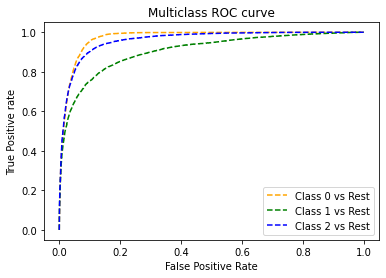

In [ ]:
# Evaluate the results
res=evaluate(xgb_model,X_train_fs,y_train,X_test_fs,y_test,'XGBoost')
final_list.append(res)


##Naive Bayes Clssifier

In [ ]:
# Importing the packages
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Instantiating all the models.
gausian = GaussianNB()
bernoulli = BernoulliNB()
multinomial = MultinomialNB()


**1) Gaussian**

In [ ]:
# Fit the model
gausian.fit(X_train_fs,y_train)


GaussianNB()

----- Evaluation on train data -----

Confusion matrix 

[[34794   103  9056]
 [21895   284 21774]
 [13454   339 30159]]

 Accuracy =  0.4947519301066299

 Recall =  0.4947519301066299

 Precision =  0.46057553515098415

 F1 score =  0.3991321574212424

 Roc_Auc score =  0.6825528164905267


----- Evaluation on test data -----

Confusion matrix 

[[8811   31 2146]
 [5410   75 5503]
 [3238   82 7669]]

 Accuracy =  0.5021993022903078

 Recall =  0.5021993022903078

 Precision =  0.46808668008170273

 F1 score =  0.4053147697500378

 Roc_Auc score =  0.6880964110992993


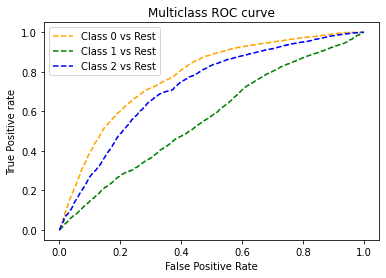

In [ ]:
# Evaluate results
res=evaluate(gausian,X_train_fs,y_train,X_test_fs,y_test,'Gaussian')
final_list.append(res)


**2) Brnoulli**

In [ ]:
# Fit model
bernoulli.fit(X_train_fs,y_train)


BernoulliNB()

----- Evaluation on train data -----

Confusion matrix 

[[33580    36 10337]
 [21700    91 22162]
 [13433    19 30500]]

 Accuracy =  0.48666747561770995

 Recall =  0.48666747561770995

 Precision =  0.532040934244499

 F1 score =  0.39019194296033377

 Roc_Auc score =  0.6390202166413582


----- Evaluation on test data -----

Confusion matrix 

[[8535   11 2442]
 [5358   29 5601]
 [3248    8 7733]]

 Accuracy =  0.4943728196572122

 Recall =  0.4943728196572122

 Precision =  0.5307556216926163

 F1 score =  0.39665441428917075

 Roc_Auc score =  0.6448103968547055


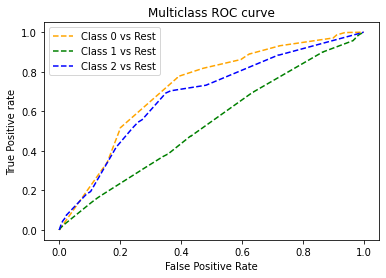

In [ ]:
# Evaluate model
res=evaluate(bernoulli,X_train_fs,y_train,X_test_fs,y_test,'Bernoulli')
final_list.append(res)


**3) Multinomial**

In [ ]:
# Fit the train set
multinomial.fit(X_train_fs,y_train)


MultinomialNB()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----- Evaluation on train data -----

Confusion matrix 

[[33580     0 10373]
 [21700     0 22253]
 [13433     0 30519]]

 Accuracy =  0.4861214336634865

 Recall =  0.4861214336634865

 Precision =  0.3240039750675175

 F1 score =  0.38867533625260425

 Roc_Auc score =  0.6759529601734487


----- Evaluation on test data -----

Confusion matrix 

[[8535    0 2453]
 [5358    0 5630]
 [3248    0 7741]]

 Accuracy =  0.493735780373123

 Recall =  0.493735780373123

 Precision =  0.32904571567746094

 F1 score =  0.3947567102632104

 Roc_Auc score =  0.681924675643561


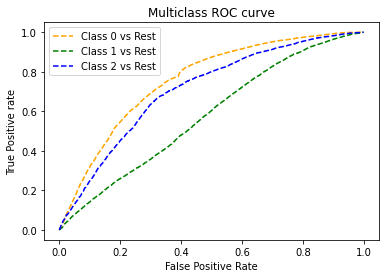

In [ ]:
# Evaluate the results
res=evaluate(multinomial,X_train_fs,y_train,X_test_fs,y_test,'Multinomial')
final_list.append(res)


All the 3 models under naive bayes give results worse than the baseline models. Hence we reject these models.



##KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
classifier_knn.fit(X_train_fs,y_train)


KNeighborsClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[31803  8520  3630]
 [ 1330 41116  1507]
 [  444  1003 42505]]

 Accuracy =  0.87536592394849

 Recall =  0.87536592394849

 Precision =  0.8837614530073115

 F1 score =  0.8726182876558367

 Roc_Auc score =  0.9806964089203102


----- Evaluation on test data -----

Confusion matrix 

[[ 7018  2785  1185]
 [  721  9609   658]
 [  188   434 10367]]

 Accuracy =  0.8188684968906416

 Recall =  0.8188684968906416

 Precision =  0.8278177507027934

 F1 score =  0.814248579022812

 Roc_Auc score =  0.9313037233206161


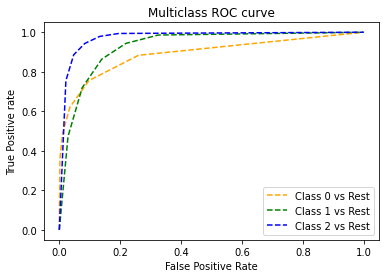

In [ ]:
# Evaluate the model
res=evaluate(classifier_knn,X_train_fs,y_train,X_test_fs,y_test,'KNN')
final_list.append(res)


In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,5)}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_fs,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([1, 2, 3, 4])})

In [ ]:
print("Best score is: ",knn_cv.best_score_)


Best score is:  0.8498233029869903


----- Evaluation on train data -----

Confusion matrix 

[[43877    59    17]
 [   55 43878    20]
 [   15    15 43922]]

 Accuracy =  0.9986273111984104

 Recall =  0.9986273111984104

 Precision =  0.9986272706338071

 F1 score =  0.9986272872107079

 Roc_Auc score =  0.9989704855124458


----- Evaluation on test data -----

Confusion matrix 

[[ 7885  2169   934]
 [  588 10071   329]
 [  227   249 10513]]

 Accuracy =  0.8636129227969058

 Recall =  0.8636129227969058

 Precision =  0.8684872106122025

 F1 score =  0.860852707576135

 Roc_Auc score =  0.8977083617008491


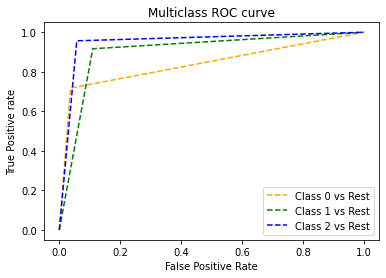

In [ ]:
# Evaluate results
res=evaluate(knn_cv,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_KNN')
final_list.append(res)


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_fs,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

----- Evaluation on train data -----

Confusion matrix 

[[43767   148    38]
 [  523 43326   104]
 [   71   134 43747]]

 Accuracy =  0.9922795734805624

 Recall =  0.9922795734805624

 Precision =  0.9923025400966301

 F1 score =  0.9922787129915198

 Roc_Auc score =  0.9998265336530543


----- Evaluation on test data -----

Confusion matrix 

[[9751 1021  216]
 [1533 8577  878]
 [ 338  775 9876]]

 Accuracy =  0.8555740937357804

 Recall =  0.8555740937357804

 Precision =  0.8553826554287027

 F1 score =  0.855029850135641

 Roc_Auc score =  0.9542635197310717


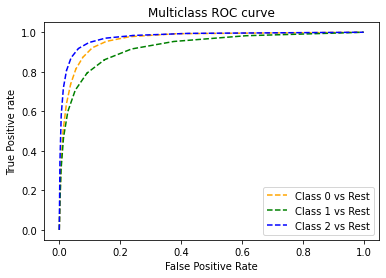

In [ ]:
# Evaluate results
res=evaluate(classifier_rf,X_train_fs,y_train,X_test_fs,y_test,'Random_Forest')
final_list.append(res)


In [ ]:
# Number of trees
n_estimators = [50,100]

# Maximum depth of trees
max_depth = [4,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()


In [ ]:
#Random search
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)


In [ ]:
rf_random.fit(X_train_fs,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   6.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   6.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   6.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   6.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   6.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.9s
[CV] END max_dept

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100],
                                        'n_estimators': [50, 100]},
                   verbose=2)

In [ ]:
#The best esitmators
rf_random.best_estimator_


RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=50)

In [ ]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_


----- Evaluation on train data -----

Confusion matrix 

[[33269  5615  5069]
 [12196 13809 17948]
 [ 6506  5565 31881]]

 Accuracy =  0.5988184258823886

 Recall =  0.5988184258823886

 Precision =  0.5911601289603015

 F1 score =  0.5797624545998101

 Roc_Auc score =  0.7913294839176025


----- Evaluation on test data -----

Confusion matrix 

[[8361 1400 1227]
 [2988 3485 4515]
 [1595 1401 7993]]

 Accuracy =  0.6018201122402548

 Recall =  0.6018201122402548

 Precision =  0.5940952640043258

 F1 score =  0.5829367780673481

 Roc_Auc score =  0.7919669041932943


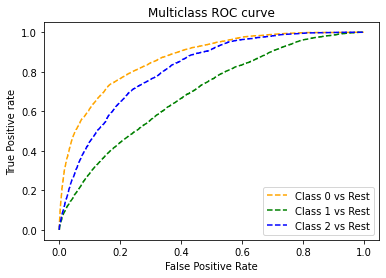

In [ ]:
# Evaluate results
res=evaluate(rf_optimal_model,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_Random_Forest')
 

##Logistic Regression

----- Evaluation on train data -----

Confusion matrix 

[[30619  5903  7431]
 [13521  9706 20726]
 [ 8218  6044 29690]]

 Accuracy =  0.5309878809021826

 Recall =  0.5309878809021826

 Precision =  0.5154344298703241

 F1 score =  0.5050093662845667

 Roc_Auc score =  0.7173395409832392


----- Evaluation on test data -----

Confusion matrix 

[[7762 1456 1770]
 [3330 2422 5236]
 [1978 1494 7517]]

 Accuracy =  0.5369634460791749

 Recall =  0.5369634460791749

 Precision =  0.5207759661729974

 F1 score =  0.510220150315352

 Roc_Auc score =  0.7208337404779552


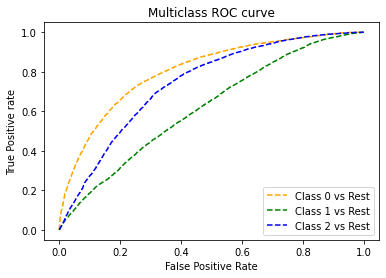

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit on the train set
logreg.fit(X_train_fs,y_train)

# Evaluate the results
res=evaluate(logreg,X_train_fs,y_train,X_test_fs,y_test,'Logistic_Regression')
final_list.append(res)


**CatBoost**

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score


In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train_fs,y_train,  
        eval_set=(X_test_fs,y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


----- Evaluation on train data -----

Confusion matrix 

[[42136  1567   250]
 [ 6688 26709 10556]
 [ 1323  5658 36971]]

 Accuracy =  0.8024996587237786

 Recall =  0.8024996587237786

 Precision =  0.8003870643604322

 F1 score =  0.7958297611193602

 Roc_Auc score =  0.9258207403292493


----- Evaluation on test data -----

Confusion matrix 

[[10425   499    64]
 [ 1679  6337  2972]
 [  363  1519  9107]]

 Accuracy =  0.7847413923858638

 Recall =  0.7847413923858638

 Precision =  0.7815507033436798

 F1 score =  0.777185129407359

 Roc_Auc score =  0.9160349806334854


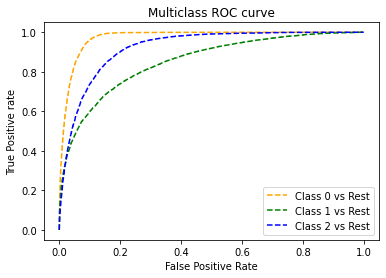

In [ ]:
# Evaluate the results
res=evaluate(clf2,X_train_fs,y_train,X_test_fs,y_test,'CatBoost')
final_list.append(res)


In [ ]:
All_model=pd.DataFrame(final_list)


In [ ]:
All_model

,MODEL_NAME,F1_SCORE_Train,PRECISION_Train,RECALL__Train,ACCURACY_Train,ROC_AUC_Train,F1_SCORE_Test,PRECISION_Test,RECALL__Test,ACCURACY_Test,ROC_AUC_Test
0,Decision_Tree_On_Under_Sampled_data,0.999122,0.999123,0.999122,0.999122,0.999998,0.484969,0.485657,0.484551,0.484551,0.613363
1,SVM_On_Under_Sampled_Data,0.505861,0.523580,0.536435,0.536435,0.722145,0.482963,0.505824,0.511938,0.511938,0.702254
2,Hypertuned_SVM_On_Under_Sampled_data,0.543274,0.554801,0.564355,0.564355,0.745338,0.508849,0.517580,0.527388,0.527388,0.706699
3,Decision_Tree,0.998658,0.998661,0.998658,0.998658,0.999998,0.800345,0.800267,0.800546,0.800546,0.850858
4,XGBoost,0.907731,0.911376,0.909258,0.909258,0.982778,0.831709,0.834949,0.835280,0.835280,0.946248
5,Gaussian,0.399132,0.460576,0.494752,0.494752,0.682553,0.405315,0.468087,0.502199,0.502199,0.688096
6,Bernoulli,0.390192,0.532041,0.486667,0.486667,0.639020,0.396654,0.530756,0.494373,0.494373,0.644810
7,Multinomial,0.388675,0.324004,0.486121,0.486121,0.675953,0.394757,0.329046,0.493736,0.493736,0.681925
8,KNN,0.872618,0.883761,0.875366,0.875366,0.980696,0.814249,0.827818,0.818868,0.818868,0.931304
9,Hyper_Tuned_KNN,0.998627,0.998627,0.998627,0.998627,0.998970,0.860853,0.868487,0.863613,0.863613,0.897708


<Figure size 1440x720 with 0 Axes>

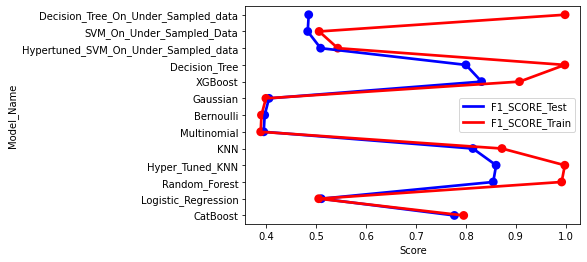

In [ ]:
ax=plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["F1_SCORE_Test"], y=All_model["MODEL_NAME"], color='b',alpha=0.2,labels=('F1_SCORE_Test'))
ax = sns.pointplot(x=All_model["F1_SCORE_Train"], y=All_model["MODEL_NAME"], color='r',alpha=0.7,labels=('F1_SCORE_Train'))
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["F1_SCORE_Test","F1_SCORE_Train"])


# visulaizing illustration
plt.show()


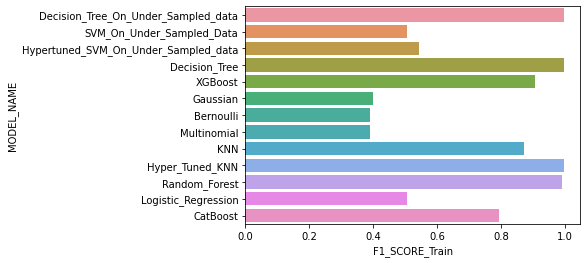

In [ ]:
#visualising our comparison df for f1 score
sns.barplot(y=All_model['MODEL_NAME'], x = All_model['F1_SCORE_Train'])


<Figure size 1440x720 with 0 Axes>

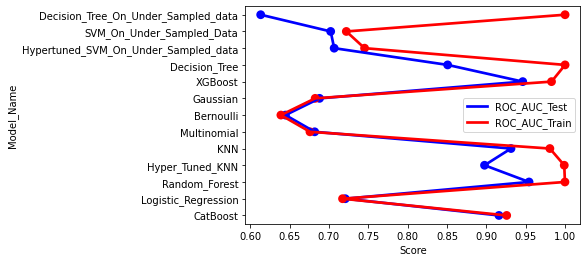

In [ ]:
plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["ROC_AUC_Test"], y=All_model["MODEL_NAME"], color='b',alpha=0.2)
ax = sns.pointplot(x=All_model["ROC_AUC_Train"], y=All_model["MODEL_NAME"], color='r',alpha=0.7)
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["ROC_AUC_Test","ROC_AUC_Train"])
# visulaizing illustration
plt.show()



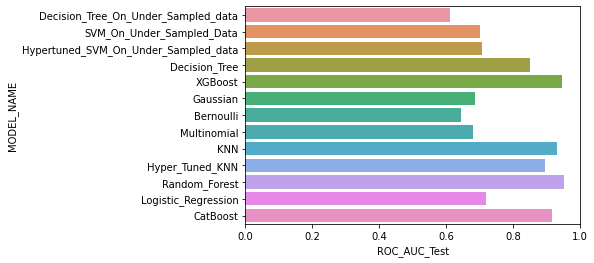

In [ ]:
#visualising our comparison df for f1 score
sns.barplot(y=All_model['MODEL_NAME'], x = All_model['ROC_AUC_Test'])


From the above plots we can observe that XG-Boost outperformed all the other models both for train as well as test.



##Conclusison



*   In EDA, we observed that Email_Campaign_Type was the most important feature. If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.



*  It was observed that both Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was same irrespective of the demographic or the time frame the emails were sent on.



*   As the word_count increases beyond the 600 mark we see that there is a high possibility of that email being ignored. The ideal mark is 400-600. No one is interested in reading long mails !


*   For modelling, it was observed that for imbalance handling Oversampling i.e. SMOTE worked way better than undersampling as the latter resulted in a lot of loss of information.




*   Based on the metrics, XG Boost Classifier worked the best giving a train score of 89% and test score of 81% for F1 score.





